<h1>Supervised Learning</h1>


<h2> Supervised - Training </h2>

Here we train MLPs as value network to learn tha value of each action at each time step in the vision and touch grasping setting. 

In [1]:
import os
from pterotactyl.policies.supervised import train


class Params: # define training arguments 
    def __init__(self):
        
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.finger = False 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = True
        self.visualize = True
        self.use_latent = True
        self.use_recon = False 
        self.layers = 4
        self.hidden_dim = 200
        self.lr = 0.001
        self.use_img = True 
        self.eval = False 
        self.greedy_checks = 3
        self.exp_id = "example" 
        self.exp_type = "supervised"
        self.epoch = 1
        self.training_actions = 5 
        self.patience = 5
        self.train_steps = 10
        self.pretrained_recon = True
        self.pretrained = False
    

params = Params()
trainer = train.Engine(params)
trainer()

pybullet build time: Sep 20 2021 20:33:29
/private/home/ejsmith/.conda/envs/cluster/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:529: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 3337.81it/s]


The number of RL_train set objects found : 122


100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 32515.87it/s]


The number of valid set objects found : 34
argv[0]=
argv[0]=


  0%|          | 0/10 [00:00<?, ?it/s]

Train || step 1 || Epoch: 0, loss: 0.125, b_ptp:  10000.000


KeyboardInterrupt: 

<h2> Supervised - Evaluation </h2>

We now evaluate the trained model. We run with the visualize paramater set to true to view predicted objects. 

100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 30789.53it/s]


The number of valid set objects found : 34
argv[0]=
argv[0]=


  0%|          | 0/17 [00:00<?, ?it/s]

Valid || score: 0.8291, reward = 0.1709
Valid || score: 0.9975, reward = 0.0025
Valid || score: 0.9811, reward = 0.0189
Valid || score: 0.7694, reward = 0.2306
Valid || score: 0.8035, reward = 0.1965
Valid || score: 0.8963, reward = 0.1037
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=
Valid || score: 1.0611, reward = -0.0611
Valid || score: 0.9957, reward = 0.0043
Valid || score: 1.0341, reward = -0.0341
Valid || score: 0.7592, reward = 0.2408
Valid || score: 0.9027, reward = 0.0973
Valid || score: 0.9025, reward = 0.0975
Valid || score: 0.8950, reward = 0.1050
Valid || score: 0.9727, reward = 0.0273
Valid || score: 1.0656, reward = -0.0656
Valid || score: 0.9834, reward = 0.0166
Valid || score: 0.5763, reward = 0.4237
******************************
*******************************************************
Total Valid || step 5 || score: 0.9074, reward = 0.0926
*******************************************************
percentage in vision is 20.00 % for policy


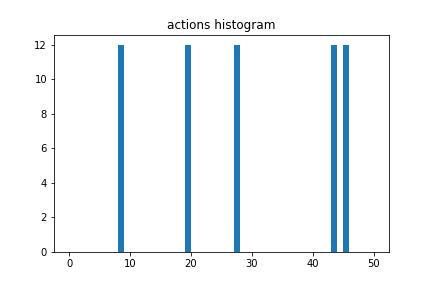




   Projected Actions


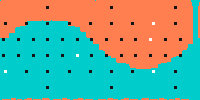

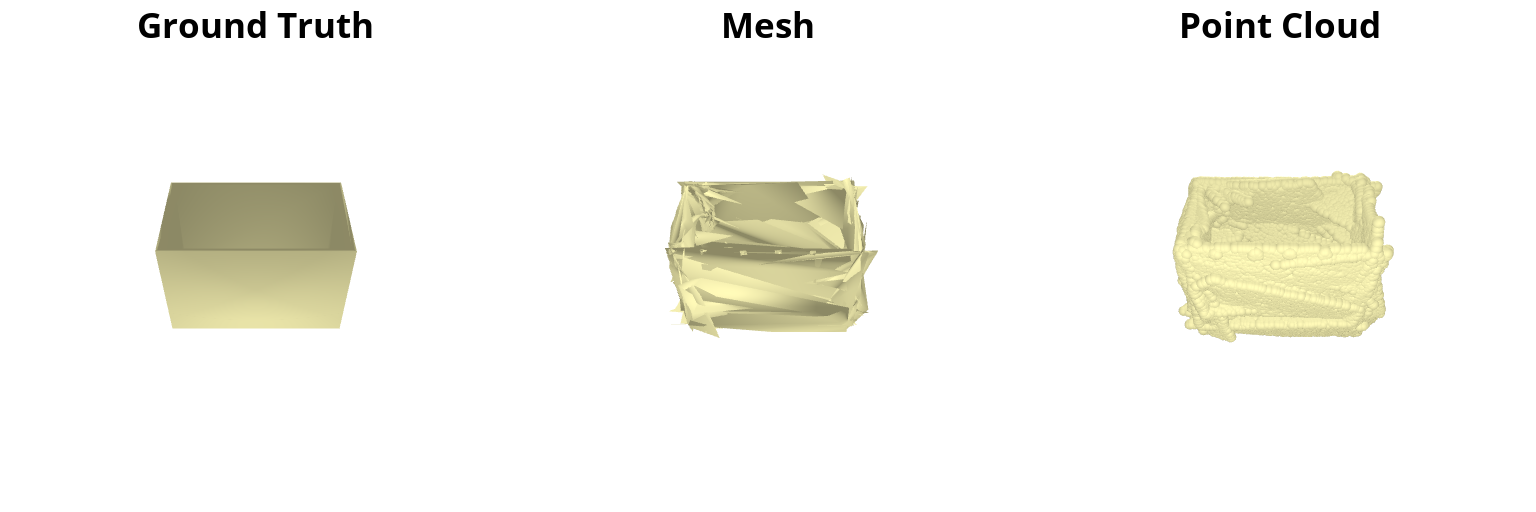

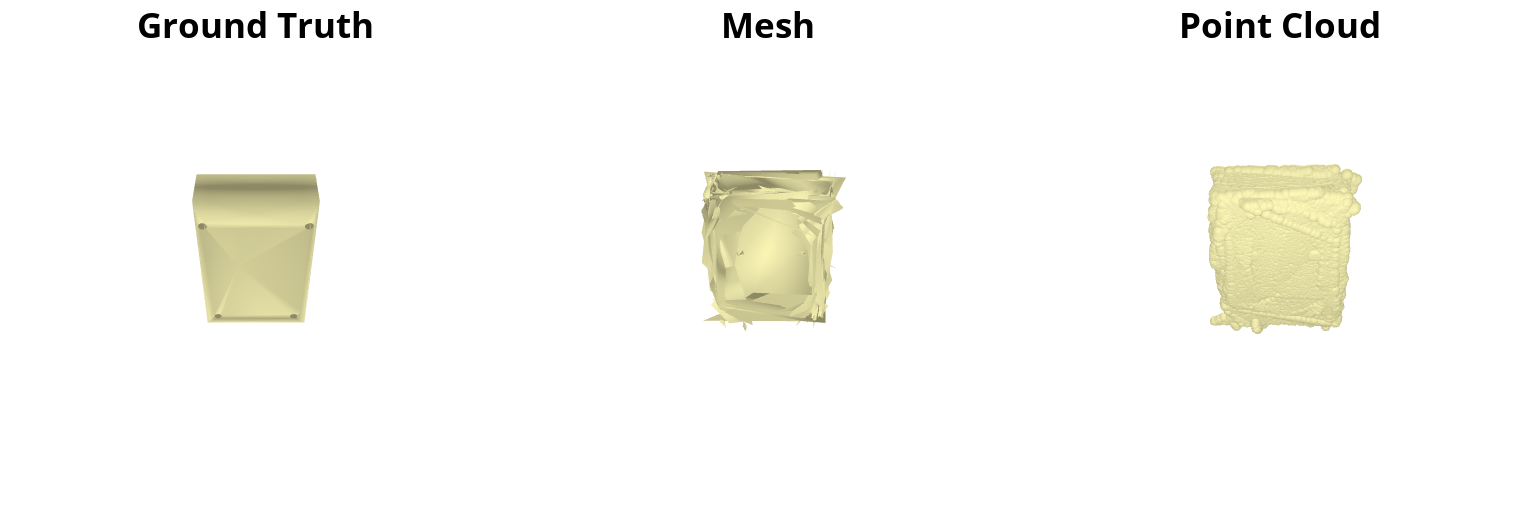

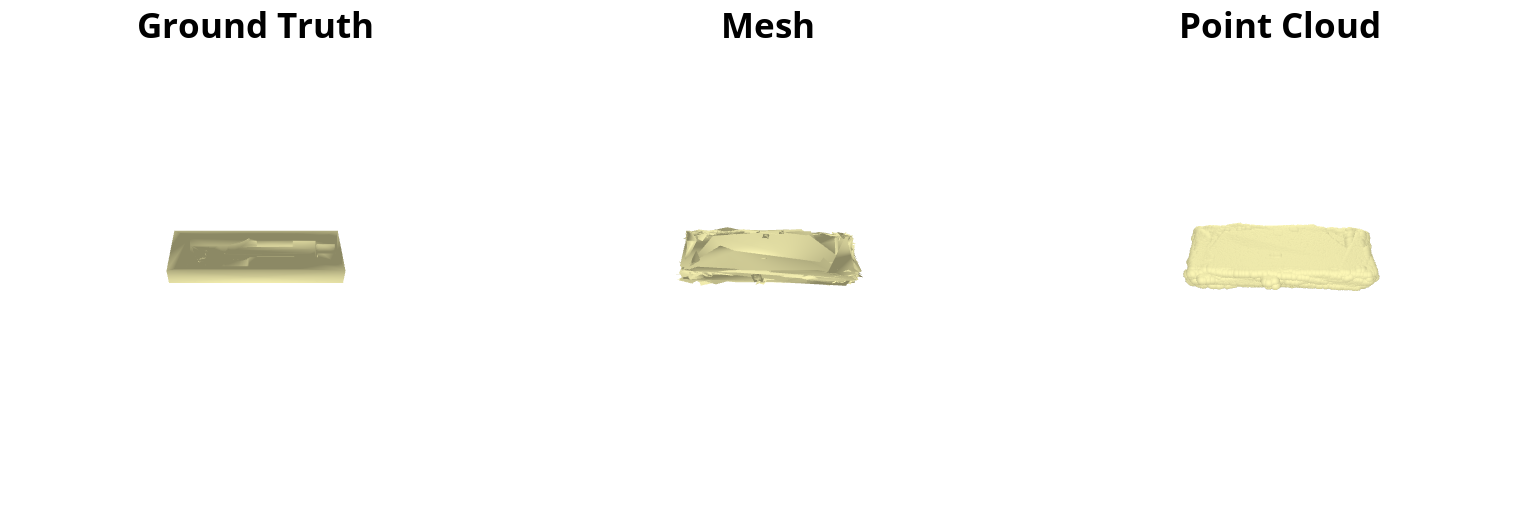

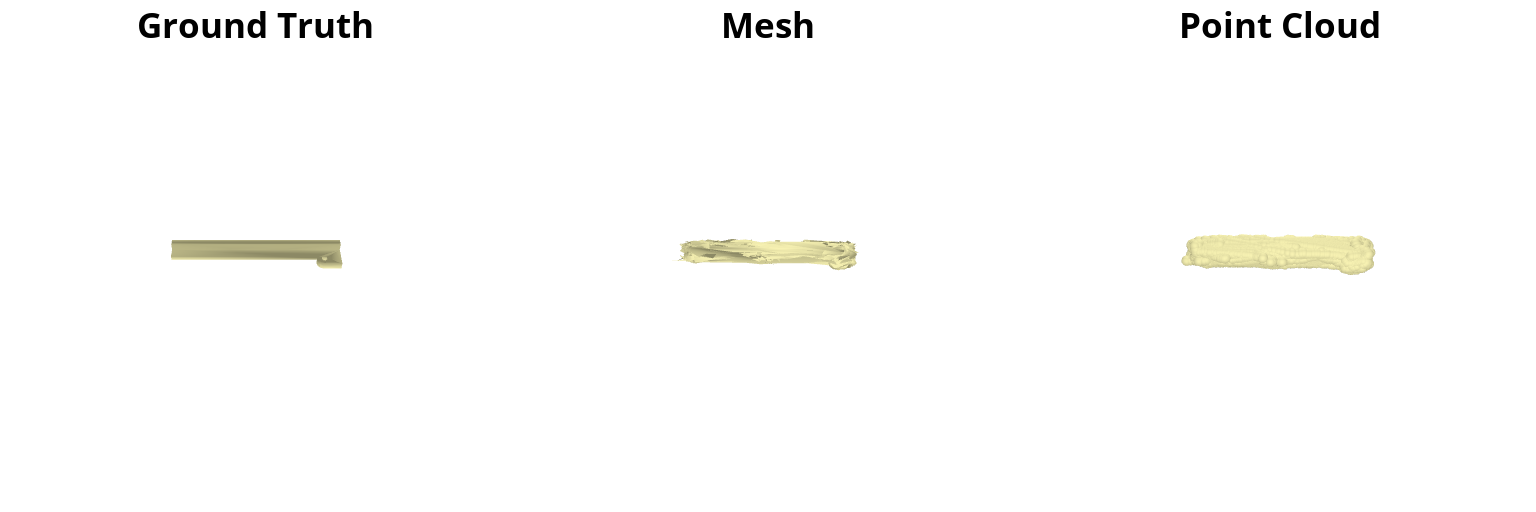

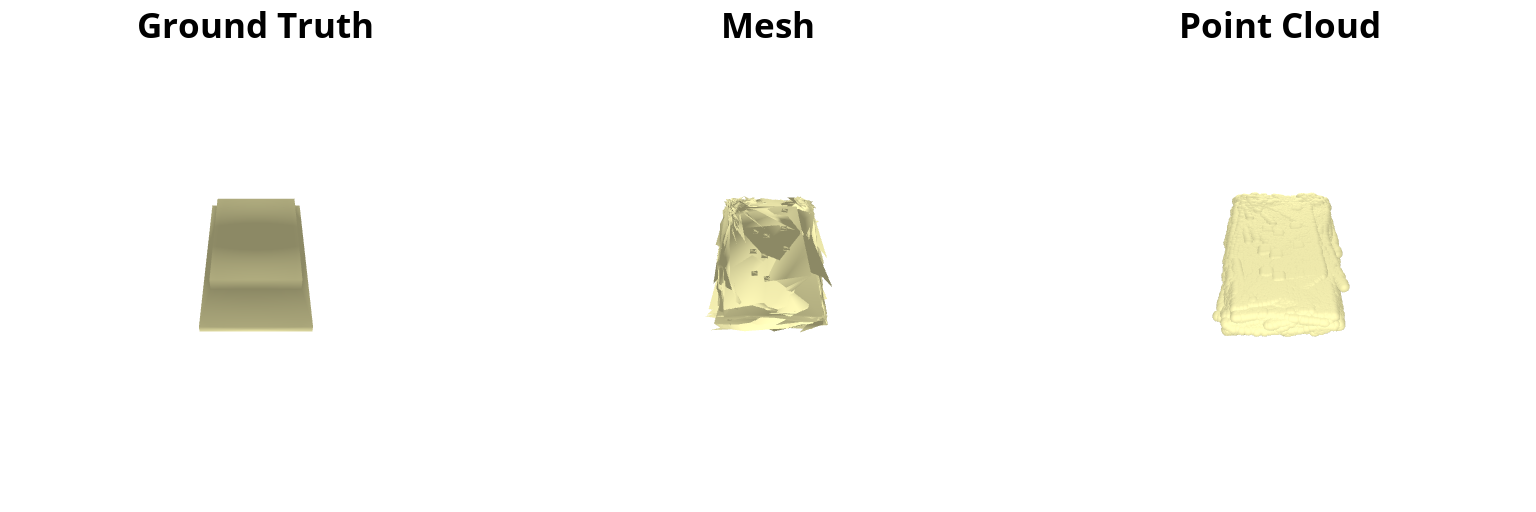

In [2]:
import os
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'


params.eval = True 
params.visualize = True
tester = train.Engine(params)
tester()


histogram = Image.open('results/supervised/example/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/supervised/example/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/supervised/example/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)

<h2> Supervised - Pretrained </h2>

We now evaluate the pretrained model in the same setting

100%|████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 45763.12it/s]


The number of test set objects found : 13
argv[0]=
argv[0]=


 17%|█████████████▊                                                                     | 1/6 [00:01<00:08,  1.68s/it]

Valid || score: 0.9638, reward = 0.0362


 33%|███████████████████████████▋                                                       | 2/6 [00:03<00:06,  1.52s/it]

Valid || score: 0.9522, reward = 0.0478


 50%|█████████████████████████████████████████▌                                         | 3/6 [00:04<00:04,  1.47s/it]

Valid || score: 0.9002, reward = 0.0998


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [00:05<00:02,  1.45s/it]

Valid || score: 1.0193, reward = -0.0193


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:07<00:01,  1.44s/it]

Valid || score: 0.9831, reward = 0.0169


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [00:08<00:01,  1.44s/it]

Valid || score: 0.9566, reward = 0.0434
*******************************
rendering the predicted objects
*******************************


  0%|          | 0/12 [00:00<?, ?it/s]

argv[0]=
argv[0]=


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:12<00:00,  2.01s/it]


******************************
*******************************************************
Total Valid || step 5 || score: 0.9626, reward = 0.0374
*******************************************************
percentage in vision is 43.33 % for policy


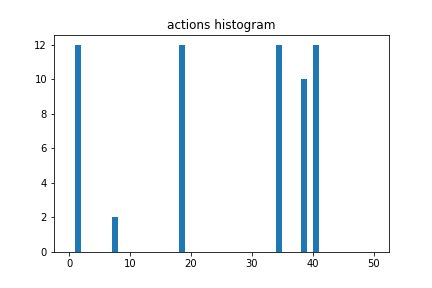




   Projected Actions


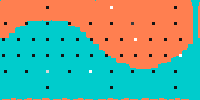

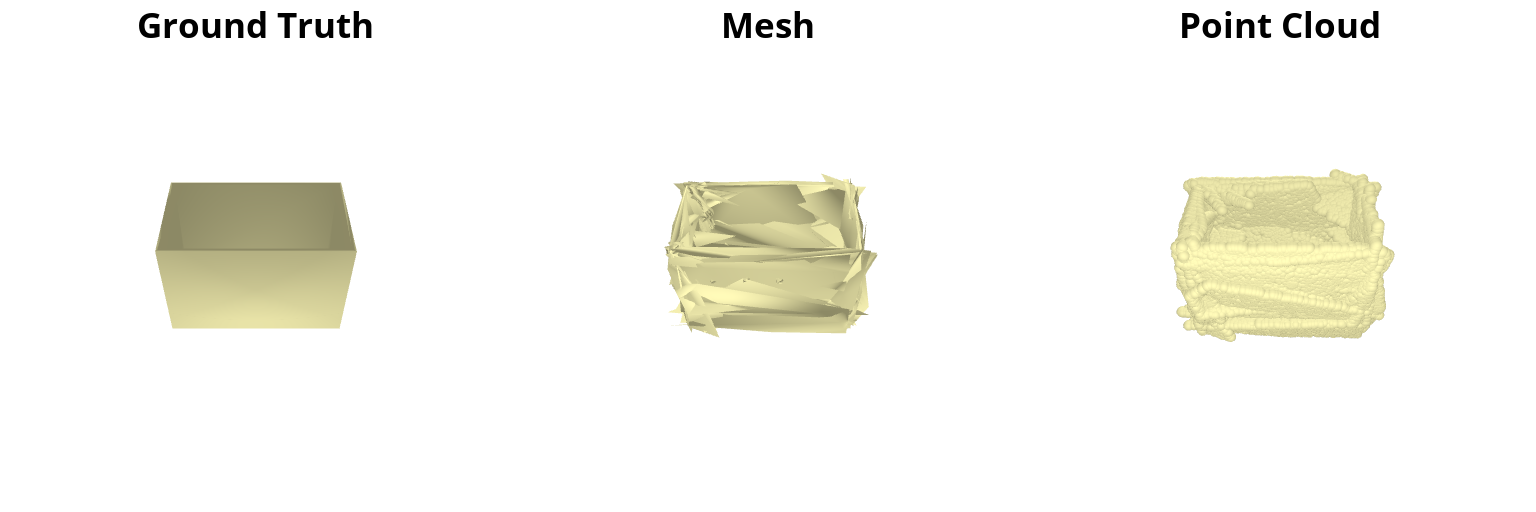

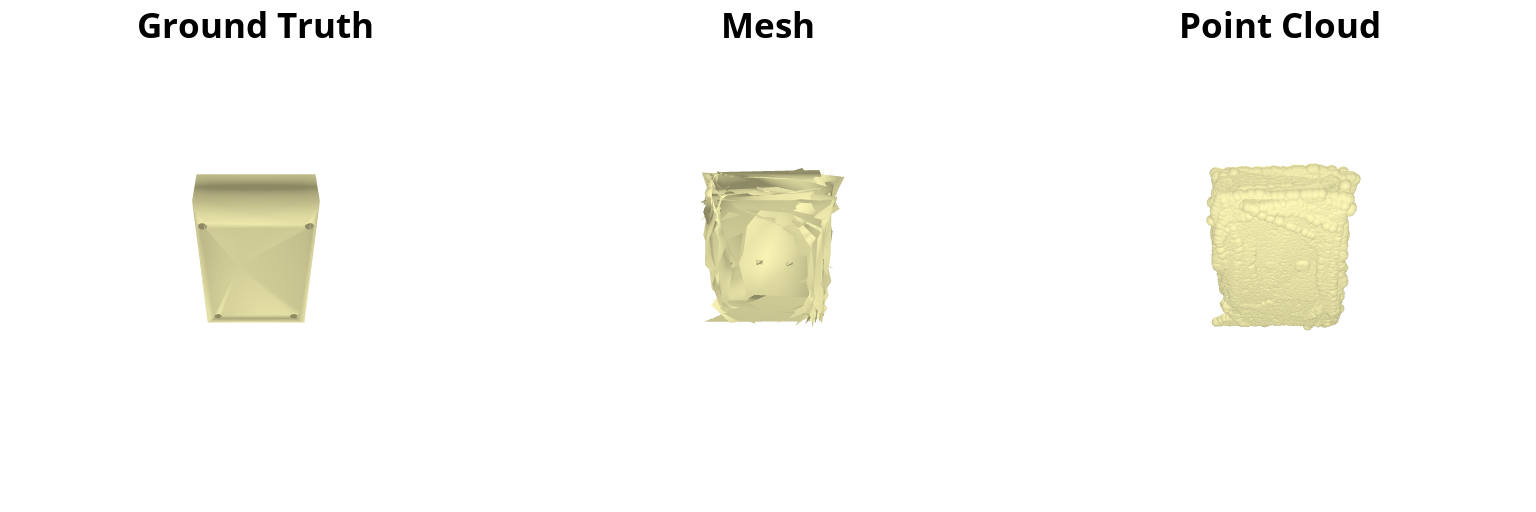

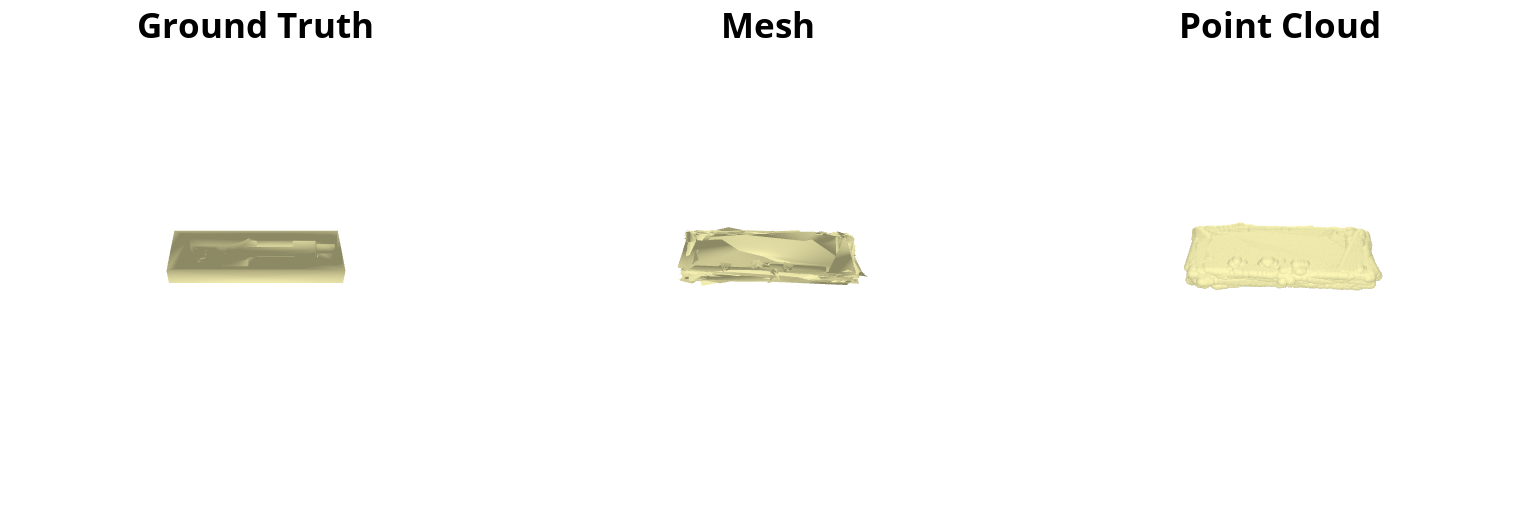

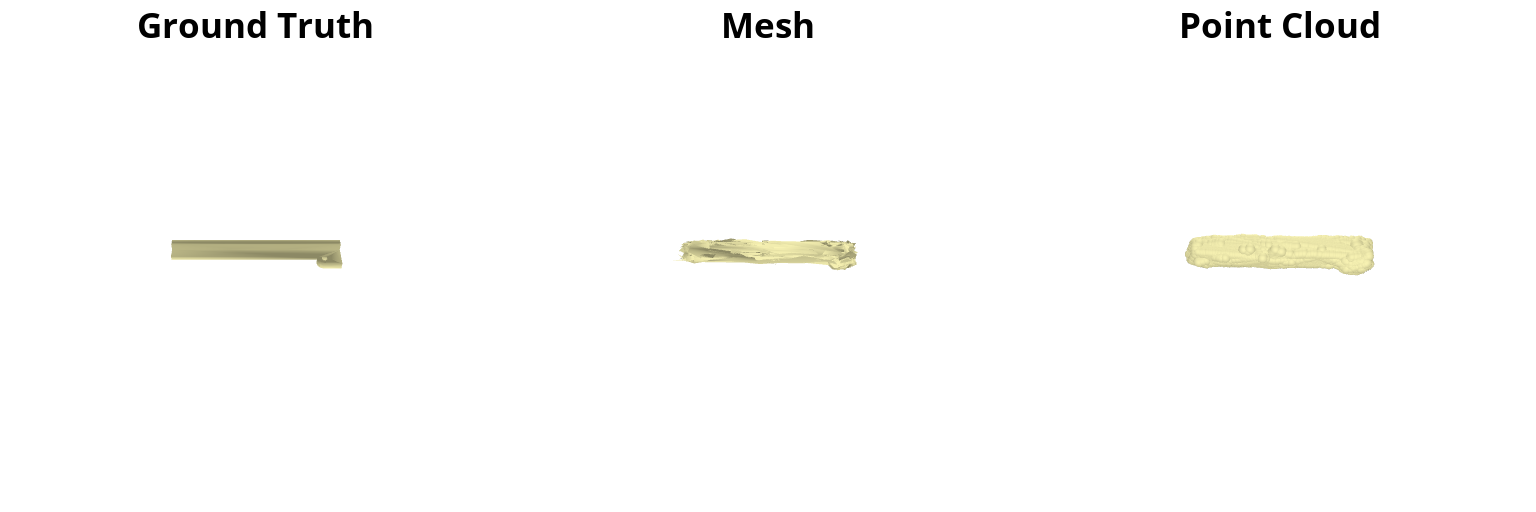

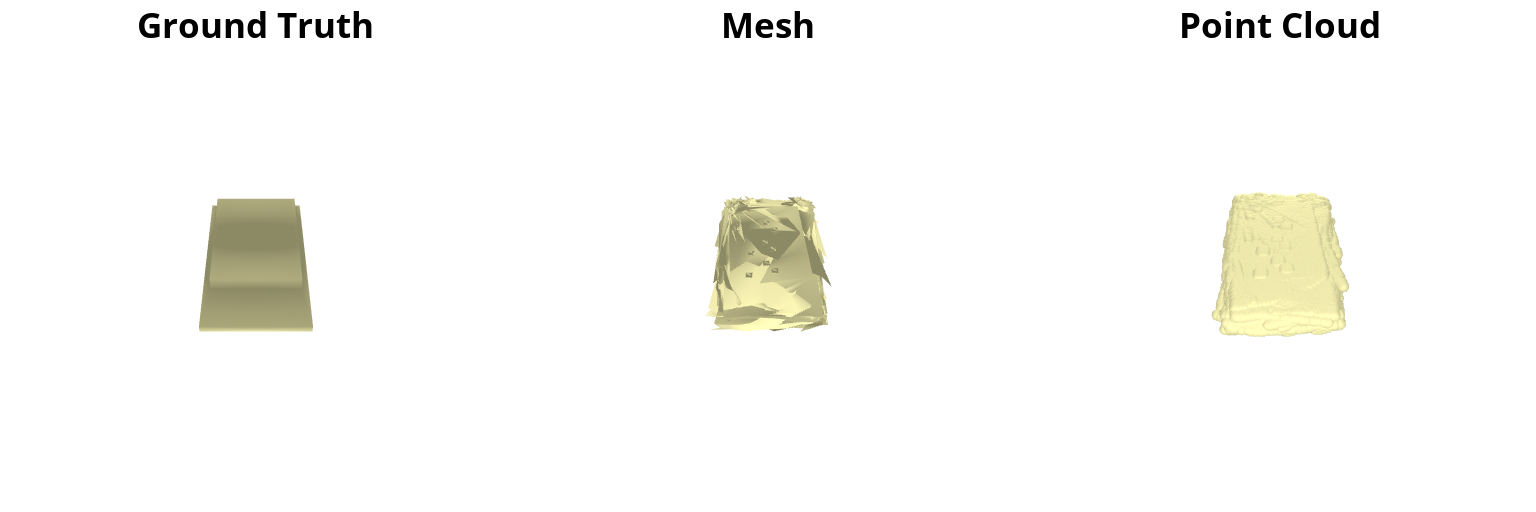

In [2]:
import os

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from glob import glob 

from pterotactyl import objects
from pterotactyl.policies.supervised import train

FONT_LOCATION = os.path.dirname(objects.__file__) + '/OpenSans-Bold.ttf'



class Params: # define training arguments 
    def __init__(self):
        self.limit_data = True
        self.env_batch_size = 2
        self.num_actions = 50
        self.seed = 0 
        self.budget = 5
        self.number_points = 10000
        self.loss_coeff = 9000
        self.finger = False 
        self.num_grasps = 5 
        self.use_touch = True 
        self.use_img = True
        self.visualize = True
        self.use_latent = True
        self.use_recon = False 
        self.layers = 4
        self.hidden_dim = 200
        self.lr = 0.001
        self.use_img = True 
        self.eval = True 
        self.greedy_checks = 3
        self.exp_id = "supervised_pre" 
        self.exp_type = "supervised"
        self.epoch = 1
        self.training_actions = 5 
        self.patience = 5
        self.train_steps = 10
        self.pretrained_recon = True
        self.pretrained=True
        self.visualize = True
        
    

params = Params()
eval = train.Engine(params)
eval()


histogram = Image.open('results/supervised/supervised_pre/histogram.png')
display(histogram)
print('\n\n')
actions = Image.open('results/supervised/supervised_pre/sphere_projection.png')
print('   Projected Actions')
display(actions)



img_locations = glob('results/supervised/supervised_pre/*/')
for location in img_locations[:5]:
    mesh = Image.open(location + "mesh.png")
    points = Image.open(location + "points.png")
    gt = Image.open(location + "ground_truth.png")
    
    
    combo = Image.new('RGB', (512*3, 512))
    x_offset = 0
    
    for im, st in [[gt, 'Ground Truth'], [mesh, 'Mesh'], [points, 'Point Cloud']]:
        
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(FONT_LOCATION, 35)
        W,H = im.size
        w,h = font.getsize(st)
        draw.text(((W-w)/2, 0),st,(0, 0, 0), font = font)
        combo.paste(im, (x_offset, 0))
        x_offset += im.size[0]
        
    display(combo)






